Assignment Tasks:-

Task 1: Simple Linear Regression:-

i. Use the scikit-learn library.
ii. Load the California Housing Dataset (or any house price dataset).
iii. Predict the house price using a single feature (e.g., number of rooms).
iv. Train a simple linear regression model.
v. Plot the regression line using matplotlib.

In [118]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
california = fetch_california_housing()
X = california.data  
y = california.target  
print("Feature names:", california.feature_names)
print("target names:", california.target_names)


Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
target names: ['MedHouseVal']


In [119]:
# Task 1: Simple Linear Regression
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

Coefficient: 0.0768
Intercept: 1.6548


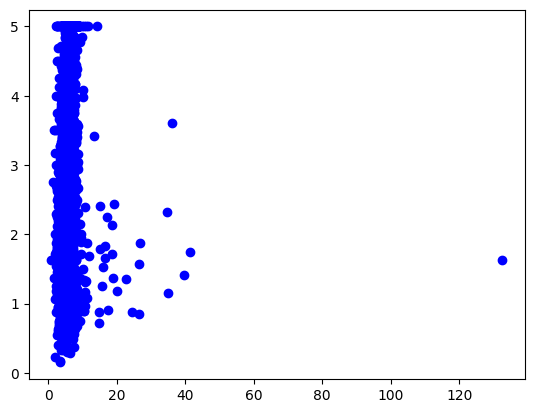

In [120]:
# Use only the 'AveRooms' feature (index 2) for prediction
X_room = X[:, [2]] 

X_train, X_test, y_train, y_test = train_test_split(X_room, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
print(f"Coefficient: {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")


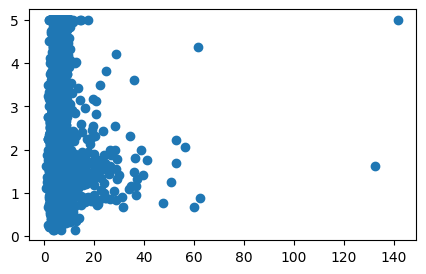

In [121]:

plt.figure(figsize=(5, 3))
plt.scatter(X_room,y)
plt.show()

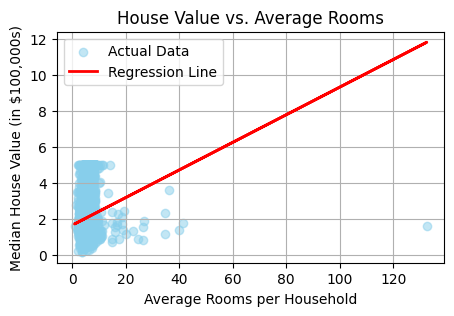

In [122]:
# Plotting the regression line
plt.figure(figsize=(5, 3))
plt.scatter(X_test, y_test, color='skyblue', label='Actual Data', alpha=0.5)
plt.plot(X_test, y_pred, color='red', label='Regression Line', linewidth=2)
plt.xlabel("Average Rooms per Household")
plt.ylabel("Median House Value (in $100,000s)")
plt.title("House Value vs. Average Rooms")
plt.legend()
plt.grid(True)
plt.show()


Task 2: Multiple Linear Regression
i. Use the same dataset or load another dataset with at least 4 numeric features.
ii. Predict the target variable using multiple independent variables.
iii. Evaluate the model using:
    1. R-squared
    2. Mean Squared Error (MSE)
    3. Root Mean Squared Error (RMSE)
iv. Display the coefficients of each feature.

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [124]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Load the California Housing dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target
print(df.head(10))


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
5  4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
6  3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
7  3.1200      52.0  4.797527   1.061824      1157.0  1.788253     37.84   
8  2.0804      42.0  4.294118   1.117647      1206.0  2.026891     37.84   
9  3.6912      52.0  4.970588   0.990196      1551.0  2.172269     37.84   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.4

In [125]:
# Displaying the DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [126]:
# Checking for missing values
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [127]:

input_colms=data.feature_names
output_colms=data.target_names

In [128]:
X_data = df[input_colms]
Y_data = df[output_colms]
X_data.head()
Y_data.head()


,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [129]:
X_data = X_data.values
Y_data = Y_data.values.reshape(-1)

In [130]:
# Displaying the shapes of the input and output data
print(X_data.shape, Y_data.shape)

(20640, 8) (20640,)


In [131]:
X_train, X_test, y_train, y_test = train_test_split(X_data,Y_data,train_size = 0.2,random_state=42)

In [132]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the target variable
y_pred = model.predict(X_test)
print(model.intercept_)
model.coef_

-37.764304845475024


array([ 4.25546113e-01,  9.15501577e-03, -9.43236037e-02,  6.74748060e-01,
        4.88938032e-06, -1.50778303e-03, -4.27714004e-01, -4.42739701e-01])

In [133]:
# R-squared
r2 = r2_score(y_test, y_pred)

# MSE
mse = mean_squared_error(y_test, y_pred)

# RMSE
rmse = np.sqrt(mse)

print(f"R2 Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


R2 Score: 0.6070
Mean Squared Error (MSE): 0.5218
Root Mean Squared Error (RMSE): 0.7224


In [134]:
# Create a DataFrame to display feature names and their coefficients
coefficients = pd.DataFrame({
    'Feature': data.feature_names,
    'Coefficient': model.coef_
})

print("\nFeature Coefficients:")
print(coefficients)



Feature Coefficients:
      Feature  Coefficient
0      MedInc     0.425546
1    HouseAge     0.009155
2    AveRooms    -0.094324
3   AveBedrms     0.674748
4  Population     0.000005
5    AveOccup    -0.001508
6    Latitude    -0.427714
7   Longitude    -0.442740


Task 3: Feature Scaling and Normalization:-

i. Demonstrate the effect of standardizing features using StandardScaler.
ii. Compare model performance before and after scaling.


In [135]:
# Task 3: Feature Scaling and Normalization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [136]:
# Load the California Housing dataset
import pandas as pd
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target

In [137]:
input_colms=data.feature_names
output_colms=data.target_names

In [138]:
X_data = df[input_colms]
Y_data = df[output_colms]

In [139]:
X_data = X_data.values
Y_data = Y_data.values.reshape(-1)

In [140]:
# Displaying the shapes of the input and output data
X_train, X_test, y_train, y_test = train_test_split(X_data,Y_data,train_size = 0.2,random_state=42)

In [141]:
model_raw = LinearRegression()
model_raw.fit(X_train, y_train)

# Predicting the target variable without scaling
y_pred_raw = model_raw.predict(X_test)

mse_raw = mean_squared_error(y_test, y_pred_raw)
rmse_raw = np.sqrt(mse_raw)
r2_raw = r2_score(y_test, y_pred_raw)

# Scaling the features using StandardScaler
print("WITHOUT SCALING:")
print(f"R2 Score: {r2_raw:.4f}")
print(f"MSE: {mse_raw:.4f}")
print(f"RMSE: {rmse_raw:.4f}")


WITHOUT SCALING:
R2 Score: 0.6070
MSE: 0.5218
RMSE: 0.7224


In [142]:
# Applying StandardScaler to scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

y_pred_scaled = model_scaled.predict(X_test_scaled)

mse_scaled = mean_squared_error(y_test, y_pred_scaled)
rmse_scaled = np.sqrt(mse_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

# Displaying the results
print("\nWITH STANDARD SCALING:")
print(f"R2 Score: {r2_scaled:.4f}")
print(f"MSE: {mse_scaled:.4f}")
print(f"RMSE: {rmse_scaled:.4f}")



WITH STANDARD SCALING:
R2 Score: 0.6070
MSE: 0.5218
RMSE: 0.7224


In [143]:
# Comparison of model performance before and after scaling
print("\nCOMPARISON:")
print(f"{'Metric'} | {'Without Scaling'} | {'With Scaling'}")
print("-" * 45)
print(f"{'R²':<10} | {r2_raw:<15.4f} | {r2_scaled:<15.4f}")
print(f"{'MSE':<10} | {mse_raw:<15.4f} | {mse_scaled:<15.4f}")
print(f"{'RMSE':<10} | {rmse_raw:<15.4f} | {rmse_scaled:<15.4f}")



COMPARISON:
Metric | Without Scaling | With Scaling
---------------------------------------------
R²         | 0.6070          | 0.6070         
MSE        | 0.5218          | 0.5218         
RMSE       | 0.7224          | 0.7224         


Task 4: Model Interpretation
i. Write Python code to:
1. Show the correlation matrix using a heatmap.
2. Identify which features have the strongest relationship with the target.
3. Discuss multicollinearity and how it might affect regression.

In [144]:
# Task 4: Model Interpretation
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt

In [145]:
# Load the California Housing dataset
data=fetch_california_housing()
df=pd.DataFrame(data.data,columns=data.feature_names)
df['MedHouseVal']=data.target


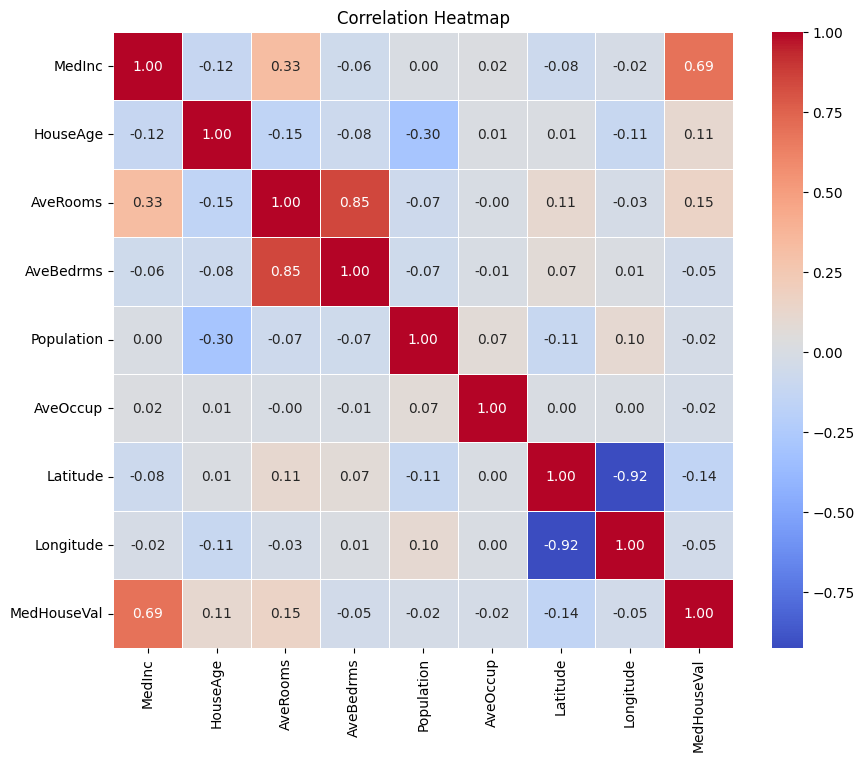

In [146]:
# Displaying the DataFrame information
matrix=df.corr()

plt.figure(figsize=(10,8))

# Plotting the correlation matrix as a heatmap
sns.heatmap(matrix, annot=True, cmap='coolwarm',fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [147]:
# Identifying the target variable
target_corr = matrix["MedHouseVal"]
target_corr



MedInc         0.688075
HouseAge       0.105623
AveRooms       0.151948
AveBedrms     -0.046701
Population    -0.024650
AveOccup      -0.023737
Latitude      -0.144160
Longitude     -0.045967
MedHouseVal    1.000000
Name: MedHouseVal, dtype: float64

In [148]:
# Feature Correlation with Target
print(target_corr.sort_values(ascending=False))

MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64


In [149]:
# Identifying features with the strongest relationship with the target
print(f"Correlation between AveRooms and AveBedrms: {df['AveRooms'].corr(df['AveBedrms']):.4f}")


Correlation between AveRooms and AveBedrms: 0.8476


 Step 5: Understanding Multicollinearity — What It Is & Why It Matters
 What Does Multicollinearity Mean?
Multicollinearity occurs when two or more input (independent) variables in your dataset are strongly related or move together.

 Example from this dataset:
Features like AveRooms and AveBedrms are likely to be closely linked — as the number of rooms increases, so do the bedrooms.

 Why Is Multicollinearity a Concern in Regression?
It can make your regression model fragile — even small shifts in the input data might cause large, unpredictable changes in the model’s coefficients.

It complicates the interpretation of feature significance.

It increases standard errors, making predictions less trustworthy.

 How to Deal with Multicollinearity:
Approach	                                Explanation
Remove one of the related features	        Drop a variable if it provides similar info as another.
Apply Regularization techniques	            Use Ridge or Lasso regression to manage correlated variables.
Use PCA (Principal Component Analysis)	    Reduces dimensionality while retaining most of the data’s variance.


